# Homework 1: Aircraft inventory analysis

In this homework, we will explore the aircraft inventory dataset from 2006 to 2023 (Source: Bureau of Transportation Statistics, www.bts.gov).  

**Some useful resources:**
- You may find explanation of the dataset attributes available in [BTS dataset attribute summary](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=GEH).
- You may verify some of your analyses by comparing your results with the BTS analysis dashboard.  The dashboard is reachable via the "Analysis" column in the attribute summary linked above.

**General rules of thumb for homeworks:**
- Read the homework questions carefully.
- Explain your choices.
- Present your findings concisely.
- Use tables, plots, and summary statistics to aid your presentation of findings.
- If you have an idea in mind but could not implement (in code), present the idea thoroughly and how you would have implemented the code. 

### Tasks:

For all tasks below, create one or more functions for any systematic changes to the dataset.  For instance, someone could run the sequence of functions to transform the dataset.

Specify the sequence of functions.

1. Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible.  Give your reasoning and code for how you decide to impute missing values.  
    - Columns for investigation: `CARRIER`, `CARRIER_NAME`, `MANUFACTURE_YEAR`, `NUMBER_OF_SEATS`, `CAPACITY_IN_POUNDS`, and `AIRLINE_ID`.
    - For example, watch out for "North American Airlines" aircrafts.  Are the `CARRIER`/`UNIQUE_CARRIER` column *really* missing?

2. Inspect the columns `MANUFACTURER`, `MODEL`, `AIRCRAFT_STATUS`, and `OPERATING_STATUS`.  Decide, for each column, if transformation or standardization of data are required.  Give your reasoning and code if you decide to transform the data.  

    **Hints:**
    - For very messy data like manufacturer/model names, give your best attempt. It is okay to not catch them all.
    - Use `value_counts()` to identify "big wins".
    - Break down into multiple steps, instead of having one line of code to do them all.

3. Remove data rows that still have missing values.  Report the amount of remaining data you obtained.

4. Transformation and derivative variables
   - For the columns `NUMBER_OF_SEATS` and `CAPACITY_IN_POUNDS`, check the skewness in the variable and plot a histogram for each variable.
   - The Box-Cox transformation (`scipy.stats.boxcox`) is one possible way to transform variables into a "more-normal-like" variable.  Apply the Box-Cox transformation for these two columns and save them as new columns, i.e. `XXXXXXXXX_BOXCOX`.
   - Plot a histogram for each transformed variable.
   - Describe what you observe before and after transformation.

5. Feature engineering
    - Create a new column `SIZE` by the quartiles of `NUMBER_OF_SEATS`
        - below 25% percentile: `SMALL`
        - 25% - 50% percentile: `MEDIUM`
        - 50% - 75% percentile: `LARGE`
        - above 75% percentile: `XLARGE`
    - For each size group, provide and plot the proportions of aircrafts that are operating versus not (`OPERATING_STATUS`). 
    - For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (`AIRCRAFT_STATUS`).
    - Provide a written summary of your findings.

### Dataset
You may read in the dataset with the following code.  Otherwise, you can find the [dataset](https://github.com/mosesyhc/de300-2026wi/raw/refs/heads/main/datasets/T_F41SCHEDULE_B43.zip) available in the `dataset` directory.  *Note* that `pandas.read_csv()` is capable of reading a zipped .csv file and no unzipping is required.

In [137]:
import pandas as pd
inventory = pd.read_csv('T_F41SCHEDULE_B43.csv')

/var/folders/hh/2dsrbb3d021_w0zs6jdygn480000gn/T/ipykernel_35512/2180530456.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv('T_F41SCHEDULE_B43.csv')


In [138]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

### Task 1

1. Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible.  Give your reasoning and code for how you decide to impute missing values.  
    - Columns for investigation: `CARRIER`, `CARRIER_NAME`, `MANUFACTURE_YEAR`, `NUMBER_OF_SEATS`, `CAPACITY_IN_POUNDS`, and `AIRLINE_ID`.
    - For example, watch out for "North American Airlines" aircrafts.  Are the `CARRIER`/`UNIQUE_CARRIER` column *really* missing?

In [139]:
# check if this is the right type of solution

def fix_carrier_name(dataframe):
    '''
    For North American Airlines, fixes the CARRIER and the UNIQUE_CARRIER columns.
    Pandas has automatically converted 'NA' to null values. 
    Replace these null values with 'NAA' for North American Airlines

    If UNIQUE_CARRIER_NAME is 'North American Airlines' and UNIQUE_CARRIER is null, then set UNIQUE_CARRIER to 'NAA'.
    If CARRIER_NAME is 'North American Airlines' and CARRIER is null, then set CARRIER to 'NAA'.

    '''
    df = dataframe.copy()
    # query and change specific rows to fill in missing data
    df.loc[(df['UNIQUE_CARRIER_NAME'] == 'North American Airlines') & (df['UNIQUE_CARRIER'].isnull()), 'UNIQUE_CARRIER'] = 'NAA'
    df.loc[(df['UNIQUE_CARRIER_NAME'] == 'North American Airlines') & (df['UNIQUE_CARRIER'] == 'NA '), 'UNIQUE_CARRIER'] = 'NAA'

    df.loc[(df['CARRIER_NAME'] == 'North American Airlines') & (df['CARRIER'].isnull()), 'CARRIER'] = 'NAA'
    df.loc[(df['CARRIER_NAME'] == 'North American Airlines') & (df['CARRIER'] == 'NA '), 'CARRIER'] = 'NAA'

    return df

In [140]:
def investigate(column):
    ''' 
    Investigates a column of a dataframe. 
    Prints out basic information. 
    Checks if the column in numeric to see if missing data can be imputed.
    '''

    # print basic information
    print(f"Column: {column.name}")
    print(f"Data type: {column.dtype}")
    print(f"Sample values: {column.unique()[:5]}") 

    # why would we not be able to impute missing data? if non-numeric 
    # or if we can fill in from other columns
    if column.dtype == 'object':
        print('Cannot use knn to impute missing data for non-numeric columns (with this setup).\n')
        return
    
    print(f"Number of missing values: {column.isnull().sum()}")

def impute_numeric_knn(df):
    '''

    Given a dataframe, selects the numeric columns and imputes missing data. 
    Uses KNN imputation with 5 neighbors.
    Plots the imputed data in individual bar charts for each column. 
    Returns imputed dataframe
    '''

    from sklearn.impute import KNNImputer

    numeric_columns = df.select_dtypes('number').columns

    imputer = KNNImputer(n_neighbors=5)
    df_numeric = df[numeric_columns]
    imputed_data = imputer.fit_transform(df_numeric)
    df_imputed = df.copy()
    df_imputed[numeric_columns] = imputed_data

    # print number of imputed values for each column
    for column in numeric_columns:
        num_imputed = df[column].isnull().sum()
        print(f"Column: {column}, Number of imputed values: {num_imputed}")

    # plot original data on top of imputed data
    import matplotlib.pyplot as plt
    import seaborn as sns
    for column in numeric_columns:

        # plots (but hard to tell if not a lot of imputed data)
        fig, ax = plt.subplots(1, 1)
        sns.histplot(df_imputed[column], stat='probability', alpha = 0.4, bins = 30, color='red', label='knn imputation')
        sns.histplot(df[column], stat='probability', alpha = 0.6, bins = 30, color='blue', label='unimputed')
        ax.legend()
        plt.show()
        

    return df_imputed
    

In [141]:
# choose from `CARRIER`, `CARRIER_NAME`, `MANUFACTURE_YEAR`, `NUMBER_OF_SEATS`, `CAPACITY_IN_POUNDS`, and `AIRLINE_ID`

investigate(inventory['AIRLINE_ID'])


Column: AIRLINE_ID
Data type: float64
Sample values: [20397. 20408. 19917. 20007. 19874.]
Number of missing values: 105


In [142]:
# print number of missing values in each column
print(inventory.select_dtypes('number').isnull().sum())

YEAR                    0
MANUFACTURE_YEAR        3
NUMBER_OF_SEATS         7
CAPACITY_IN_POUNDS    101
AIRLINE_ID            105
dtype: int64


Column: YEAR, Number of imputed values: 0
Column: MANUFACTURE_YEAR, Number of imputed values: 3
Column: NUMBER_OF_SEATS, Number of imputed values: 7
Column: CAPACITY_IN_POUNDS, Number of imputed values: 101
Column: AIRLINE_ID, Number of imputed values: 105


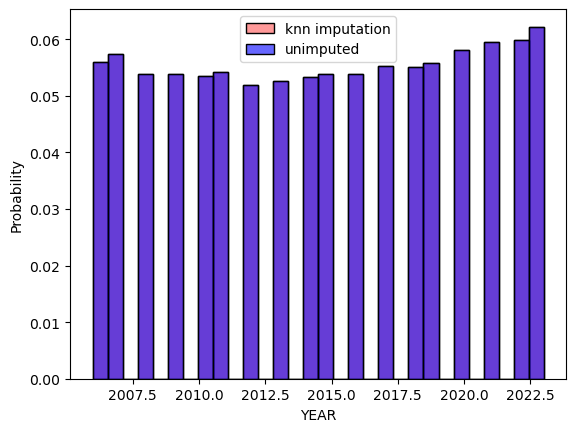

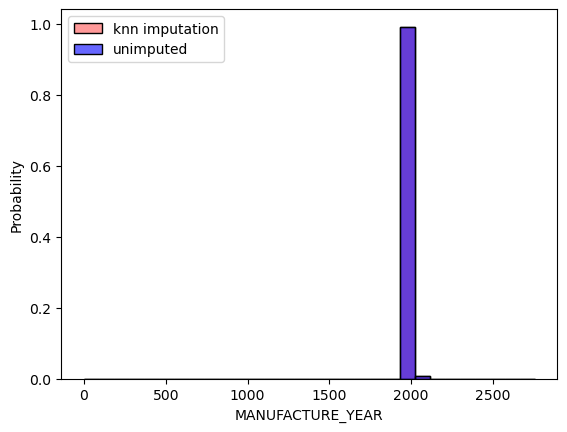

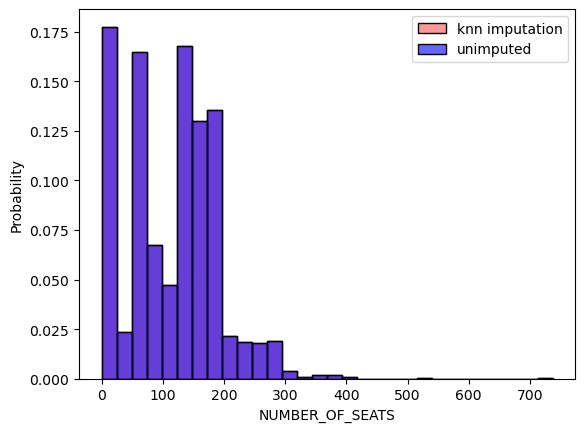

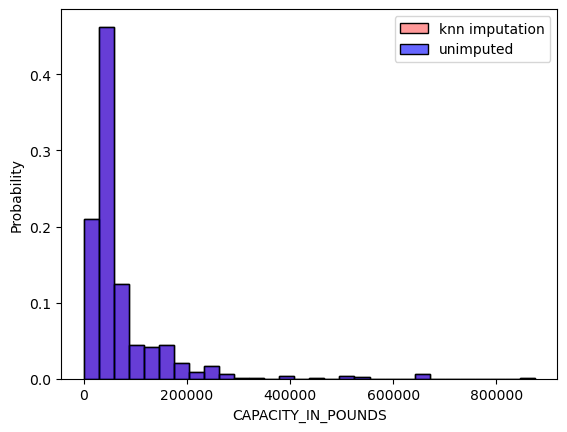

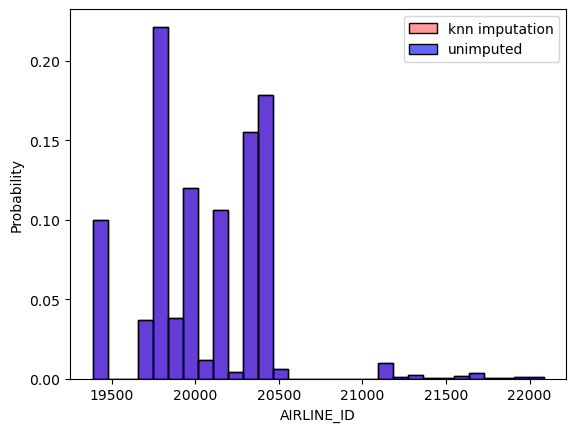

In [143]:
inventory_cleaned = fix_carrier_name(inventory)
inventory_imputed = impute_numeric_knn(inventory_cleaned)


#### Response

I decided to impute missing values in two ways:
1. For CARRIER and CARRIER_NAME, I saw that North American Airlines' code was 'NA'. When loading the dataset with pandas, it identified these as NaN. For columns where UNIQUE_CARRIER_NAME was 'North American Airlines' and UNIQUE_CARRIER was null, then I set UNIQUE_CARRIER to 'NAA'. For columns where CARRIER_NAME was 'North American Airlines' and CARRIER was null, then I set CARRIER to 'NAA'. I noticed there were also cases where it was not null because it included a space after ('NA '). I also transformed these to 'NAA'.

2. For the knn imputation, I decided to impute for all the numeric columns in the dataset. 216 values were imputed in total from the numeric columns. From the histograms, the imputed data is not very visible because it makes up a very small percentage of each column. 

### Task 2

2. Inspect the columns `MANUFACTURER`, `MODEL`, `AIRCRAFT_STATUS`, and `OPERATING_STATUS`.  Decide, for each column, if transformation or standardization of data are required.  Give your reasoning and code if you decide to transform the data.  

    **Hints:**
    - For very messy data like manufacturer/model names, give your best attempt. It is okay to not catch them all.
    - Use `value_counts()` to identify "big wins".
    - Break down into multiple steps, instead of having one line of code to do them all.

In [144]:
inventory_imputed['OPERATING_STATUS'].value_counts()
#inventory_imputed['MANUFACTURER'].value_counts()
#inventory_imputed['MODEL'].value_counts()
#inventory_imputed['AIRCRAFT_STATUS'].value_counts()

OPERATING_STATUS
Y    126577
N      5664
y        71
          1
Name: count, dtype: int64

In [145]:
def uppercase(column):
    '''
    transforms a column to uppercase
    ex. for aircraft status:
    O or o -> O
    '''
    return column.str.upper()

def empty_to_na(column):
    '''
    replaces empty strings with NaN
    '''
    return column.mask(column.str.strip() == '', pd.NA) 
    
def std_manufacturers(column):
    '''
    standardizes manufacturer names to a simple form
    all entries containing 'BOEING' should be standardized to 'BOEING'
    all entries containing 'AIRBUS' should be standardized to 'AIRBUS
    removes extra spaces
    '''
    col = column.str.upper() # make uppercase
    col = col.apply(lambda x: 'BOEING' if 'BOEING' in x else x)
    col = col.apply(lambda x: 'AIRBUS' if 'AIRBUS' in x else x)
    return col.str.strip()
    

# standardize the columns
inventory_imputed['OPERATING_STATUS_STD'] = uppercase(inventory_imputed['OPERATING_STATUS'])
inventory_imputed['OPERATING_STATUS_STD'] = empty_to_na(inventory_imputed['OPERATING_STATUS_STD'])
inventory_imputed['AIRCRAFT_STATUS_STD'] = uppercase(inventory_imputed['AIRCRAFT_STATUS'])
inventory_imputed['MODEL_STD'] = uppercase(inventory_imputed['MODEL'])
inventory_imputed['MANUFACTURER_STD'] = std_manufacturers(inventory_imputed['MANUFACTURER'])


#### Response:

From my initial inspection, I was able to identify several types of errors in several of the given columns. 

For aircraft status and operating status, there are lowercase versions of several of the possible statuses. From the documentation for both columns, this is shown to be an error, because only the uppercase codes are assigned meanings. For these two columns, I standardized them by changing the entire column to uppercase. Operating status also had one entry that was a single space (' ') and I replaced this with NaN.

For model, I did not have enough prior knowledge to identify specific errors, but I transformed the column to uppercase to catch those cases. 

For manufacturer, I noticed that there were many variations of the same manufacturer. For example, Boeing was written as BOEING, Boeing, THEBOEINGCO, etc. For this column, I transformed everything to uppercase, and then for some noticeable cases, I was able to standardize further. For Boeing and Airbus, if these strings were in the entry, I replaced the entry with these standardized versions. I also noticed that there were a couple entries that had excess spacing, so I removed that. 

### Task 3

3. Remove data rows that still have missing values.  Report the amount of remaining data you obtained.

In [146]:
def remove_missing_data_rows(df):
    '''
    removes rows with any missing data from the dataframe
    '''
    clean_df = df.copy()
    print(f'Number of missing rows:\n{df.isnull().sum()}') # print number of missing rows per column
    print(f'\nOriginal shape: {df.shape}')
    clean_df = clean_df.dropna(axis=0, how='any') # drop whole rows if they have any missing data
    print(f'\nNew shape: {clean_df.shape}')
    return clean_df

In [147]:
inventory_imputed = remove_missing_data_rows(inventory_imputed)

Number of missing rows:
YEAR                        0
CARRIER                     0
CARRIER_NAME              105
MANUFACTURE_YEAR            0
UNIQUE_CARRIER_NAME       105
SERIAL_NUMBER               0
TAIL_NUMBER                 0
AIRCRAFT_STATUS             0
OPERATING_STATUS            0
NUMBER_OF_SEATS             0
MANUFACTURER                0
AIRCRAFT_TYPE           29933
MODEL                      11
CAPACITY_IN_POUNDS          0
ACQUISITION_DATE          967
AIRLINE_ID                  0
UNIQUE_CARRIER            105
OPERATING_STATUS_STD        1
AIRCRAFT_STATUS_STD         0
MODEL_STD                  11
MANUFACTURER_STD            0
dtype: int64

Original shape: (132313, 21)

New shape: (101304, 21)


In [148]:
inventory_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101304 entries, 29239 to 132312
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   YEAR                  101304 non-null  float64
 1   CARRIER               101304 non-null  object 
 2   CARRIER_NAME          101304 non-null  object 
 3   MANUFACTURE_YEAR      101304 non-null  float64
 4   UNIQUE_CARRIER_NAME   101304 non-null  object 
 5   SERIAL_NUMBER         101304 non-null  object 
 6   TAIL_NUMBER           101304 non-null  object 
 7   AIRCRAFT_STATUS       101304 non-null  object 
 8   OPERATING_STATUS      101304 non-null  object 
 9   NUMBER_OF_SEATS       101304 non-null  float64
 10  MANUFACTURER          101304 non-null  object 
 11  AIRCRAFT_TYPE         101304 non-null  object 
 12  MODEL                 101304 non-null  object 
 13  CAPACITY_IN_POUNDS    101304 non-null  float64
 14  ACQUISITION_DATE      101304 non-null  object 
 15  A

#### Response

The original dataframe had 132,313 entries. After removing all rows that contained any missing data, I was left with 101,305 entries. 29,933 of the deletions were due to missing data in the AIRCRAFT_TYPE column. 

### Task 4

4. Transformation and derivative variables
   - For the columns `NUMBER_OF_SEATS` and `CAPACITY_IN_POUNDS`, check the skewness in the variable and plot a histogram for each variable.
   - The Box-Cox transformation (`scipy.stats.boxcox`) is one possible way to transform variables into a "more-normal-like" variable.  Apply the Box-Cox transformation for these two columns and save them as new columns, i.e. `XXXXXXXXX_BOXCOX`.
   - Plot a histogram for each transformed variable.
   - Describe what you observe before and after transformation.


In [149]:
def skewtest_and_hist(column):
    '''
    uses scipy skewtest (if p < 0.05, column is skewed)
    plots histogram of a column
    '''
    from scipy.stats import skewtest
    import matplotlib.pyplot as plt

    # skew test
    _, p = skewtest(column)
    if p < 0.05:
        print(f'{column.name} is significantly skewed')
    else:
        print(f'{column.name} is not significantly skewed')
    
    print(f'p value: {p}')

    # plot histogram
    plt.figure(figsize=(4,3))
    plt.title(f'{column.name}')
    plt.xlabel(column.name)
    plt.ylabel('Frequency')
    plt.hist(column, bins=30, alpha=0.7)

def boxcox_transform(column):
    '''
    checks if data is positive
    if negative, throws an error
    if contains zeros, adds 1E-12 to all zeros
    apply the boxcox transform to a single column
    returns transformed column
    '''
    from scipy.stats import boxcox

    # check for positivity
    if (column < 0).any():
        print(f'{column.name} contains negative values. cannot apply box-cox')
    elif (column == 0).any():
        # only add 1E-12 to zeros
        print(f'{column.name} contains zeros. adding 1E-12 to zeros before box-cox')
        column[column == 0] += 1E-12
    else:
        print(f'{column.name} is positive. applying box-cox')

    transformed_col, _ = boxcox(column)
    return transformed_col

CAPACITY_IN_POUNDS is significantly skewed
p value: 0.0
NUMBER_OF_SEATS is significantly skewed
p value: 0.0


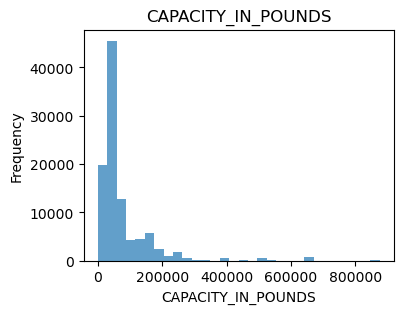

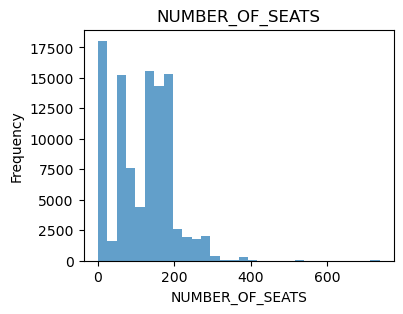

In [150]:
skewtest_and_hist(inventory_imputed['CAPACITY_IN_POUNDS'])
skewtest_and_hist(inventory_imputed['NUMBER_OF_SEATS'])

CAPACITY_IN_POUNDS contains zeros. adding 1E-12 to zeros before box-cox
CAPACITY_IN_POUNDS_BOXCOX is significantly skewed
p value: 0.0
NUMBER_OF_SEATS contains zeros. adding 1E-12 to zeros before box-cox
NUMBER_OF_SEATS_BOXCOX is significantly skewed
p value: 0.0


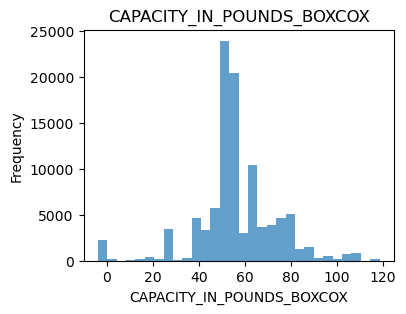

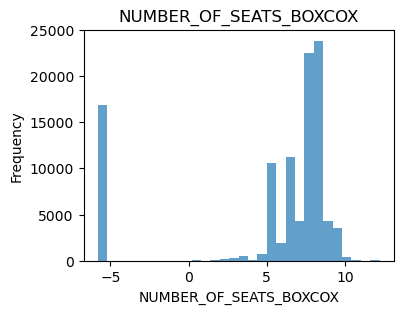

In [151]:
inventory_imputed['CAPACITY_IN_POUNDS_BOXCOX'] = boxcox_transform(inventory_imputed['CAPACITY_IN_POUNDS'])
skewtest_and_hist(inventory_imputed['CAPACITY_IN_POUNDS_BOXCOX'])

inventory_imputed['NUMBER_OF_SEATS_BOXCOX'] = boxcox_transform(inventory_imputed['NUMBER_OF_SEATS'])
skewtest_and_hist(inventory_imputed['NUMBER_OF_SEATS_BOXCOX'])

#### Response

For both columns, I plotted a histogram and also performed a scipy skew test. Both of these analyses showed that the two columns were skewed. Because of this, I performed a boxcox transformation on the columns. This transformation requires that values be positive, but both columns had 0 values. For these specific values, I added 1E-12 so that the transformation could occur, without changing the value of the entry in a significant way. 

From the post-box-cox histograms, the plots look much less skewed. This might be more useful if these data are being fed into a model or used for imputation of missing values. However, the values also lose their meaning on their own unless they are converted back to the original values. 

### Task 5

5. Feature engineering
    - Create a new column `SIZE` by the quartiles of `NUMBER_OF_SEATS`
        - below 25% percentile: `SMALL`
        - 25% - 50% percentile: `MEDIUM`
        - 50% - 75% percentile: `LARGE`
        - above 75% percentile: `XLARGE`
    - For each size group, provide and plot the proportions of aircrafts that are operating versus not (`OPERATING_STATUS`). 
    - For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (`AIRCRAFT_STATUS`).
    - Provide a written summary of your findings.

In [152]:
def size_quartile_feature(df, old_feature):

    print(f"Creating new feature 'SIZE from '{old_feature}' based on quartiles.")

    # create new feature
    df['SIZE'] = None

    # find quartiles
    Q1 = df[old_feature].quantile(0.25)
    Q2 = df[old_feature].quantile(0.50)
    Q3 = df[old_feature].quantile(0.75)
    print(f"Q1: {Q1}, Q2: {Q2}, Q3: {Q3}")

    # assign new values based on quartiles
    df.loc[df[old_feature] <= Q1, 'SIZE'] = 'SMALL'
    df.loc[(df[old_feature] > Q1) & (df[old_feature] <= Q2), 'SIZE'] = 'MEDIUM'
    df.loc[(df[old_feature] > Q2) & (df[old_feature] <= Q3), 'SIZE'] = 'LARGE'
    df.loc[df[old_feature] > Q3, 'SIZE'] = 'EXTRA_LARGE'

    # plot bar plot of new feature
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6,4))
    plt.title(f'Bar plot of "SIZE"')
    plt.xlabel('SIZE')
    plt.ylabel('Count')
    df['SIZE'].value_counts().reindex(['SMALL', 'MEDIUM', 'LARGE', 'EXTRA_LARGE']).plot(kind='bar')
    plt.show()


def plot_proportions(df, target_feature):
    '''
    ex. 
    For each size group, provide and plot the proportions of aircrafts that are operating versus not (`OPERATING_STATUS`). 
    For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (`AIRCRAFT_STATUS`).
    '''
    import matplotlib.pyplot as plt

    target_feature = df[target_feature]
    
    size_order = ['SMALL', 'MEDIUM', 'LARGE', 'EXTRA_LARGE']
    prop_table = (df.groupby('SIZE')[target_feature.name].value_counts(normalize=True).unstack(fill_value=0))
    prop_table = prop_table.reindex(size_order)

    display(prop_table)

    ax = prop_table.plot(kind='bar',figsize=(6,4), width=0.8)
    ax.set_title(f'Proportion of {target_feature.name} by Size Group')
    ax.set_ylabel('Proportion')
    ax.set_xlabel('Size Group')
    ax.legend(title=target_feature.name)
    plt.show()


Creating new feature 'SIZE from 'NUMBER_OF_SEATS' based on quartiles.
Q1: 50.0, Q2: 136.0, Q3: 169.0


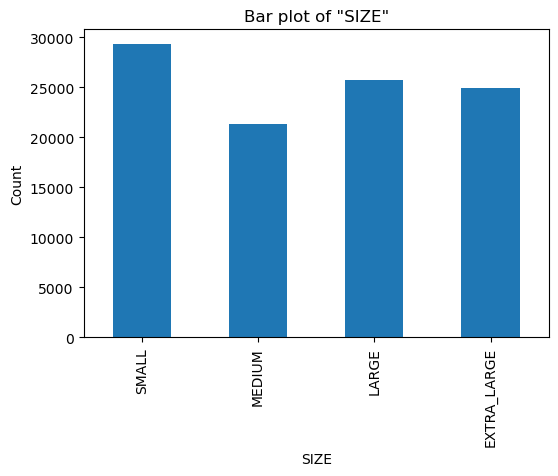

In [153]:
size_quartile_feature(inventory_imputed, 'NUMBER_OF_SEATS')

OPERATING_STATUS_STD,N,Y
SIZE,,
SMALL,0.046695,0.953305
MEDIUM,0.040401,0.959599
LARGE,0.032507,0.967493
EXTRA_LARGE,0.031157,0.968843


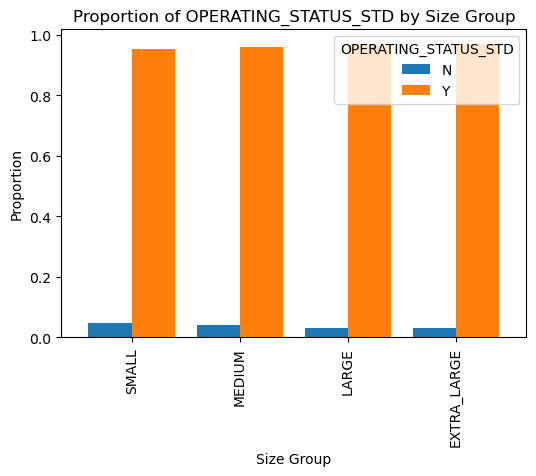

AIRCRAFT_STATUS_STD,A,B,L,O
SIZE,,,,
SMALL,0.039327,0.398868,0.000000,0.561805
MEDIUM,0.076401,0.417115,0.001592,0.504892
LARGE,0.115545,0.195040,0.001869,0.687546
EXTRA_LARGE,0.075547,0.197169,0.001604,0.725680


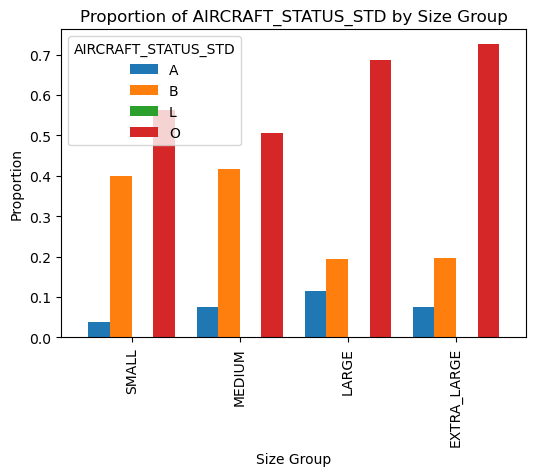

In [154]:
for feature in ['OPERATING_STATUS_STD', 'AIRCRAFT_STATUS_STD']:
    plot_proportions(inventory_imputed, feature)

#### Response

From the plot of Operating Status by Size, it is visible that the proportion of 'Y' vs 'N' across size groups is relatively constant. However, from the proportion of Aircraft Status by Size, it seems like although the relative sizes are similar across groups, there are some differences. Primarily, the medium and small groups have a much larger proportion of 'B' status aircraft. The extra large and large groups have a smaller proportion of 'B,' and so they have larger proportions of 'O.' Because there are so few 'L' status aircraft, these are not visible on the plot. 

# Submission guidelines
Your submission should be contained in a `homework_1` folder of your Github repository, and it should include 
- a `readme.md` file including how to run the code and what your expected outputs are (if the code is run), 
- your source code, and
- a `.pdf` or `.html` file containing your written answers.

# Generative AI disclosure

*Syllabus* policy: 

Required disclosure: each submission must include an AI Usage note stating: (1) tool(s) used, (2) the key prompt(s), and (3) what you changed and how you verified the results. If none, write: “AI Usage: None.”

I used ChatGPT to help generate the plotting function for 5 because I was struggling to show the grouping correctly. 

Prompt: "Help complete this plot: 

plot_proportions(dataframe, target_feature): 
''' 
ex. For each size group, provide and plot the proportions of aircrafts that are operating versus not (OPERATING_STATUS). For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (AIRCRAFT_STATUS). ''' 
import matplotlib.pyplot as plt 
target_feature = df[target_feature]
plt.figure(figsize=(6,4)) 
plt.title(f'{target_feature.name} by size group') 
grouped = inventory_imputed.groupby('SIZE')[target_feature]
plt.bar(grouped.size(), grouped.size().values)
plt.xlabel('Size Group') 
plt.xlabel('Proportion') 
plt.show()"

I was able to visually confirm that the plots looked as I was intending. I also chose to display the prop_table to check that the data made sense with what I would have expected. I also adjusted some small visual settings and added the reindexing. 
